<h1>Elecciones 2023</h1>

<h2>Configuracion</h2>

<b>Instalations</b>

In [1]:
%pip install --upgrade plotly
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\marco\OneDrive\Documents\Marcos\Programacion\PYTHON\elecciones\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\marco\OneDrive\Documents\Marcos\Programacion\PYTHON\elecciones\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\marco\OneDrive\Documents\Marcos\Programacion\PYTHON\elecciones\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\marco\OneDrive\Documents\Marcos\Programacion\PYTHON\elecciones\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\marco\OneDrive\Documents\Marcos\Programacion\PYTHON\elecciones\venv\Scripts\python.exe -m pip install --upgrade pip' command.


<b>Imports</b>

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

<b>Pandas Config</b>

In [97]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

<h2>Base de datos general</h2>

<b>Importar archivo</b>

In [4]:
file_name = "ResultadosElectorales_2023.csv"
df_data = pd.read_csv(file_name, low_memory=False, encoding="utf-8")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868102 entries, 0 to 5868101
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   año                       int64  
 1   eleccion_tipo             object 
 2   recuento_tipo             object 
 3   padron_tipo               object 
 4   distrito_id               int64  
 5   distrito_nombre           object 
 6   seccionprovincial_id      int64  
 7   seccionprovincial_nombre  object 
 8   seccion_id                int64  
 9   seccion_nombre            object 
 10  circuito_id               object 
 11  circuito_nombre           object 
 12  mesa_id                   int64  
 13  mesa_tipo                 object 
 14  mesa_electores            int64  
 15  cargo_id                  int64  
 16  cargo_nombre              object 
 17  agrupacion_id             int64  
 18  agrupacion_nombre         object 
 19  lista_numero              float64
 20  lista_nombre            

<b>Listar los cargos</b>

In [7]:
df_data["cargo_nombre"].unique()

array(['PRESIDENTE Y VICE', 'SENADOR NACIONAL', 'JEFE/A DE GOBIERNO',
       'DIPUTADO NACIONAL', 'DIPUTADO PROVINCIAL', 'SENADOR PROVINCIAL',
       'GOBERNADOR Y VICE', 'INTENDENTE', 'PARLAMENTO MERCOSUR NACIONAL',
       'PARLAMENTO MERCOSUR REGIONAL', 'CONCEJAL',
       'MIEMBROS DE JUNTA COMUNAL', 'DIPUTADOS/AS DE LA CIUDAD AUTONOMA'],
      dtype=object)

<b>Preparar la informacion</b>

In [76]:
cargo_presidencial = "PRESIDENTE Y VICE"

# Agregar un ID combinado para asegurarase que sea unico
df_data['id_mesa_unico'] = df_data['distrito_id'].astype(str) + "-" + \
                          df_data['seccionprovincial_id'].astype(str) + "-" + \
                          df_data['seccion_id'].astype(str) + "-" + \
                          df_data['circuito_id'].astype(str) + "-" + \
                          df_data['mesa_id'].astype(str)

# Considerar solo los votos positivos
votos_positivos = df_data[df_data['votos_tipo'] == "POSITIVO"]

# Considerar solo los votos para presidente
votos_positivos_presidenciales = votos_positivos[votos_positivos["cargo_nombre"]==cargo_presidencial]

# Obtener los totales por mesa
votos_positivos_presidenciales_by_mesa = votos_positivos_presidenciales.groupby('id_mesa_unico')['votos_cantidad'].sum().reset_index()

#Agregar el total de cada mesa a cada registro
votos_positivos_presidenciales = votos_positivos_presidenciales.merge(votos_positivos_presidenciales_by_mesa, on='id_mesa_unico', how='left', suffixes=('', '_sum'))
# Renombrar la columna
votos_positivos_presidenciales = votos_positivos_presidenciales.rename(columns={'votos_cantidad_sum': 'total_votos_mesa'})

# Calcular el porcentaje
votos_positivos_presidenciales['votos_porcentaje'] = (votos_positivos_presidenciales['votos_cantidad'] / votos_positivos_presidenciales['total_votos_mesa']) * 100

# Eliminar las mesas que dan NaN en el porcentaje (tienen 0 votos)
votos_positivos_presidenciales.dropna(subset=['votos_porcentaje'], inplace=True)


<h2>Chequear TOTALES por partido con la informacion oficial</h2><br>
Para asegurarse que estamos trabjando con el 100% de la informacion

In [102]:
# Calcular totales
totales_por_partido = votos_positivos_presidenciales.groupby('agrupacion_nombre')['votos_cantidad'].sum()

# Convertir a DataFrame
df_totales = totales_por_partido.reset_index()

# Calcular el total general
overall_total = df_totales['votos_cantidad'].sum()
print(f"Total General: {overall_total:,}")

# Calcular el porcentaje por partido
df_totales['porcentaje'] = (df_totales['votos_cantidad'] / overall_total) * 100
# Agregar separadores a la cantidad de votos
df_totales['votos_cantidad'] = df_totales['votos_cantidad'].apply(lambda x: f"{x:,}")

# Display the DataFrame
df_totales

Total General: 26,291,718


,agrupacion_nombre,votos_cantidad,porcentaje
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,"709,932",2.70
1,HACEMOS POR NUESTRO PAIS,"1,784,315",6.79
2,JUNTOS POR EL CAMBIO,"6,267,152",23.84
3,LA LIBERTAD AVANZA,"7,884,336",29.99
4,UNION POR LA PATRIA,"9,645,983",36.69


<img src="totales_oficiales_2023.png">

<h2>Informacion por partido</h2>

<b>Totales</b><br>
Ponderado en base a la cantidad de votantes por mesa

In [103]:
up_total = votos_positivos_presidenciales[(votos_positivos_presidenciales['agrupacion_nombre'] == "UNION POR LA PATRIA")].copy()
lla_total = votos_positivos_presidenciales[(votos_positivos_presidenciales['agrupacion_nombre'] == "LA LIBERTAD AVANZA")].copy()
jxc_total = votos_positivos_presidenciales[(votos_positivos_presidenciales['agrupacion_nombre'] == "JUNTOS POR EL CAMBIO")].copy()

# Promedio de votantes por mesa (es lo mismo para todos los partidos) 
promedio_vot = jxc_total["total_votos_mesa"].mean()

# Agregar la ponderacion a la tabla de cada partido
up_total['ponderacion'] = up_total['total_votos_mesa'] / promedio_vot
lla_total['ponderacion'] = lla_total['total_votos_mesa'] / promedio_vot
jxc_total['ponderacion'] = jxc_total['total_votos_mesa'] / promedio_vot



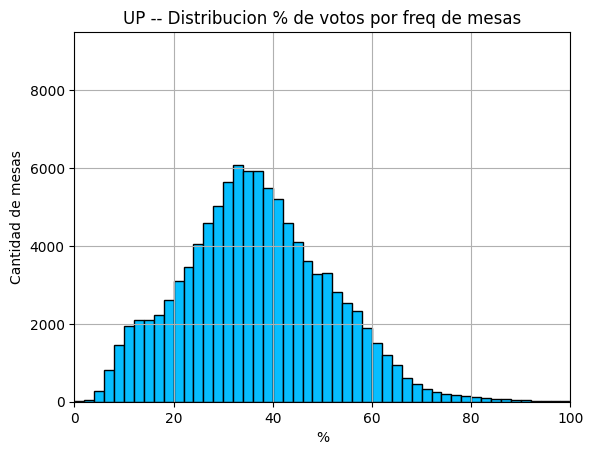

In [104]:
## UP
# Crear Histograma
up_total['votos_porcentaje'].hist(bins=50, weights=up_total['ponderacion'], edgecolor='black', color="#06beff")

# Add title and labels
plt.title('UP -- Distribucion % de votos por freq de mesas')
plt.xlabel('%')
plt.ylabel('Cantidad de mesas')
plt.ylim(0, 9500)
plt.xlim(0, 100)

# Mostrar grafico
plt.show()

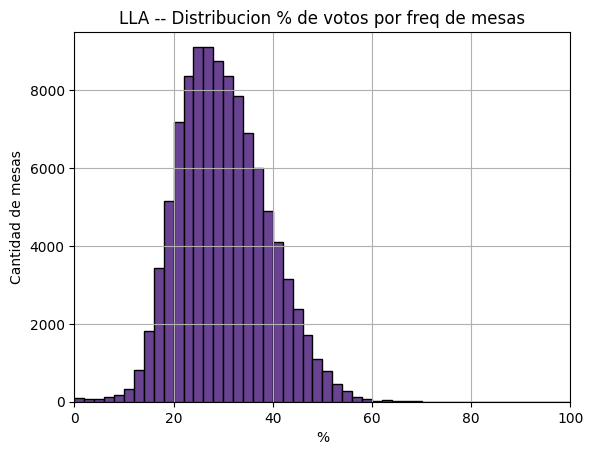

In [105]:
## LLA
# Crear Histograma
lla_total['votos_porcentaje'].hist(bins=50, weights=lla_total['ponderacion'], edgecolor='black', color="#694291")

# Add title and labels
plt.title('LLA -- Distribucion % de votos por freq de mesas')
plt.xlabel('%')
plt.ylabel('Cantidad de mesas')
plt.ylim(0, 9500)
plt.xlim(0, 100)

# Mostrar grafico
plt.show()

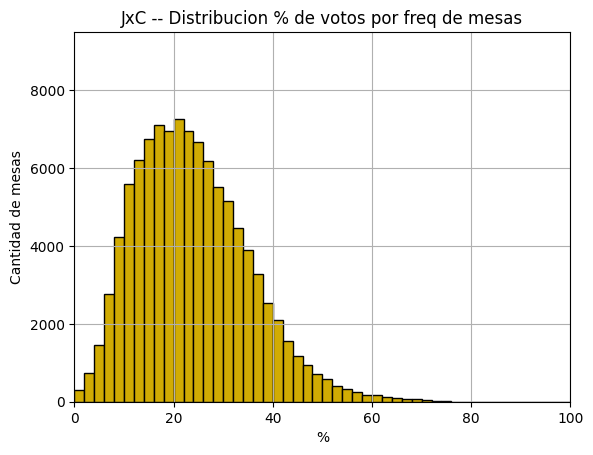

In [106]:
## JXC
# Crear Histograma
jxc_total['votos_porcentaje'].hist(bins=50, weights=jxc_total['ponderacion'], edgecolor='black', color="#d1ac03")

# Add title and labels
plt.title('JxC -- Distribucion % de votos por freq de mesas')
plt.xlabel('%')
plt.ylabel('Cantidad de mesas')
plt.ylim(0, 9500)
plt.xlim(0, 100)

# Mostrar grafico
plt.show()

<b>Colas</b><br>
Filtrando mesas con 30 votos o mas, en las que los candidatos obtuvieron mas del 70%.

In [107]:
# Resultados filtrados 
up_cola = up_total[(up_total['votos_porcentaje'] > 70) & (up_total['total_votos_mesa'] > 30)]
lla_cola = lla_total[(lla_total['votos_porcentaje'] > 70) & (lla_total['total_votos_mesa'] > 30)]
jxc_cola = jxc_total[(jxc_total['votos_porcentaje'] > 70) & (jxc_total['total_votos_mesa'] > 30)]


UP obtuvo 70% o mas en 1,785 mesas, por un total de 322,699 votos.
Esto representa el 3.35% de sus votos y el 1.23% del total de votos.



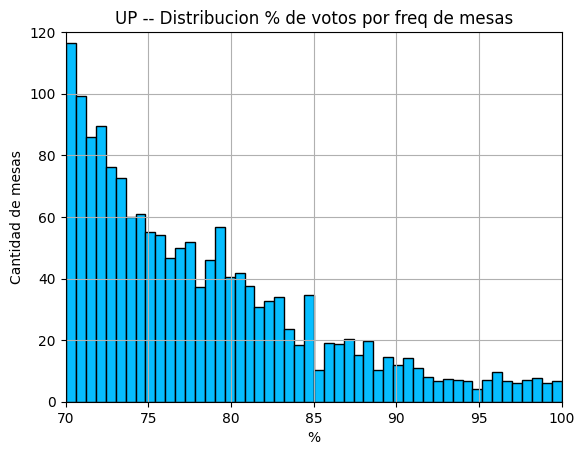

In [122]:
## UP

# Estadisticas
up_cola_mesas = len(up_cola)
up_cola_votos = up_cola["votos_cantidad"].sum()
up_cola_porc_sus_votos = (up_cola["votos_cantidad"].sum() / up_total["votos_cantidad"].sum()) * 100
up_cola_porc_total = (up_cola["votos_cantidad"].sum() / overall_total) * 100
print(f"UP obtuvo 70% o mas en {up_cola_mesas:,} mesas, por un total de {up_cola_votos:,} votos.")
print(f"Esto representa el {up_cola_porc_sus_votos:.2f}% de sus votos y el {up_cola_porc_total:.2f}% del total de votos.\n")

# Crear Histograma
up_cola['votos_porcentaje'].hist(bins=50, weights=up_cola['ponderacion'], edgecolor='black', color="#06beff")

# Add title and labels
plt.title('UP -- Distribucion % de votos por freq de mesas')
plt.xlabel('%')
plt.ylabel('Cantidad de mesas')
plt.ylim(0, 120)
plt.xlim(70, 100)

# Mostrar grafico
plt.show()

LLA obtuvo 70% o mas en 14 mesas, por un total de 1,233 votos.
Esto representa el 0.02% de sus votos y el 0.00% del total de votos.



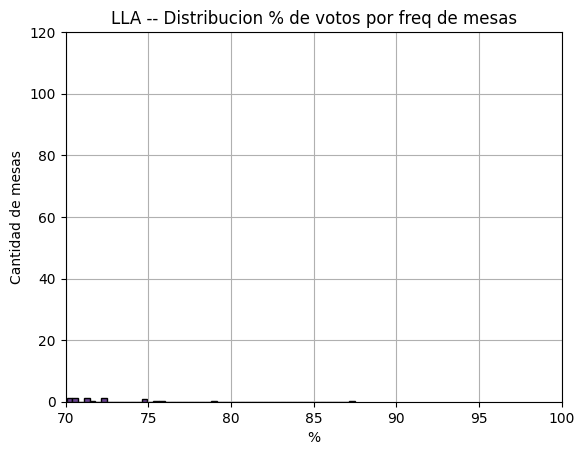

In [128]:
## LLA

# Estadisticas
lla_cola_mesas = len(lla_cola)
lla_cola_votos = lla_cola["votos_cantidad"].sum()
lla_cola_porc_sus_votos = (lla_cola["votos_cantidad"].sum() / lla_total["votos_cantidad"].sum()) * 100
lla_cola_porc_total = (lla_cola["votos_cantidad"].sum() / overall_total) * 100
print(f"LLA obtuvo 70% o mas en {lla_cola_mesas:,} mesas, por un total de {lla_cola_votos:,} votos.")
print(f"Esto representa el {lla_cola_porc_sus_votos:.2f}% de sus votos y el {lla_cola_porc_total:.2f}% del total de votos.\n")

# Crear Histograma
lla_cola['votos_porcentaje'].hist(bins=50, weights=lla_cola['ponderacion'], edgecolor='black', color="#694291")

# Add title and labels
plt.title('LLA -- Distribucion % de votos por freq de mesas')
plt.xlabel('%')
plt.ylabel('Cantidad de mesas')
plt.ylim(0, 120)
plt.xlim(70, 100)

# Mostrar grafico
plt.show()

JxC obtuvo 70% o mas en 77 mesas, por un total de 12,938 votos.
Esto representa el 0.21% de sus votos y el 0.05% del total de votos.



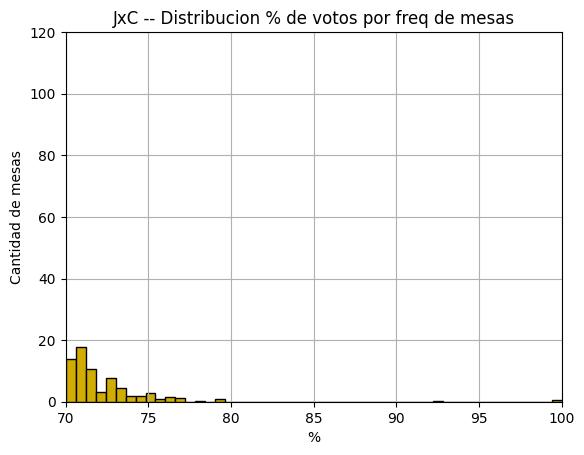

In [129]:
## JxC

# Estadisticas
jxc_cola_mesas = len(jxc_cola)
jxc_cola_votos = jxc_cola["votos_cantidad"].sum()
jxc_cola_porc_sus_votos = (jxc_cola["votos_cantidad"].sum() / jxc_total["votos_cantidad"].sum()) * 100
jxc_cola_porc_total = (jxc_cola["votos_cantidad"].sum() / overall_total) * 100
print(f"JxC obtuvo 70% o mas en {jxc_cola_mesas:,} mesas, por un total de {jxc_cola_votos:,} votos.")
print(f"Esto representa el {jxc_cola_porc_sus_votos:.2f}% de sus votos y el {jxc_cola_porc_total:.2f}% del total de votos.\n")

# Crear Histograma
jxc_cola['votos_porcentaje'].hist(bins=50, weights=jxc_cola['ponderacion'], edgecolor='black', color="#d1ac03")

# Add title and labels
plt.title('JxC -- Distribucion % de votos por freq de mesas')
plt.xlabel('%')
plt.ylabel('Cantidad de mesas')
plt.ylim(0, 120)
plt.xlim(70, 100)

# Mostrar grafico
plt.show()